<a href="https://colab.research.google.com/github/TOUATI-MOHAMED/introduction-to-deep-learning-tensorflow-keras/blob/master/Deep_Learning_basics_with_TensorFlow__and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  using  and import TensorFlow as library for Deep Learning 

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [2]:
# check the Python version 
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Version info.
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


###  load in MNIST data

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [55]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

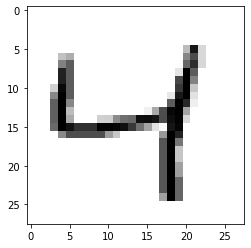

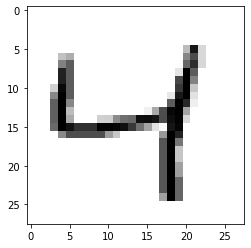

In [56]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()


In [57]:
print(y_train[2])


4
4


### "Normalize" the  data

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

###  Build our Model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  # take this 28x28 image, and make it a flat 1x784. 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # This layer has 128 units. The activation function is relu, short for rectified linear
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))



In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fit the data " traning phase" 

In [61]:
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9229
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9768


Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2639 - accuracy: 0.9228
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0738 - accuracy: 0.9768


In [62]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9731
0.09011896699666977
0.9731000065803528
313/313 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9696
0.09498941898345947
0.9696000218391418


In [63]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)


INFO:tensorflow:Assets written to: epic_num_reader.model/assets
[[3.8673292e-10 3.9566048e-09 1.6826400e-05 ... 9.9998260e-01
  2.7043989e-09 3.1744580e-09]
 [1.2070325e-10 1.1198164e-03 9.9887770e-01 ... 6.5773563e-08
  5.0133128e-08 1.0245393e-11]
 [4.5680654e-08 9.9995172e-01 9.2702743e-07 ... 3.5975434e-05
  6.7577403e-06 2.5098811e-07]
 ...
 [1.8772131e-09 4.3622485e-08 1.5204289e-08 ... 4.2818629e-06
  8.5677772e-07 6.3639665e-05]
 [1.6177525e-07 8.3031671e-07 1.2298742e-07 ... 1.0495481e-05
  9.8551472e-04 2.4658442e-09]
 [3.5301505e-06 3.5871338e-08 2.9976402e-06 ... 2.5597915e-09
  8.2093516e-07 3.4524778e-08]]
INFO:tensorflow:Assets written to: epic_num_reader.model/assets
[[5.87059679e-10 8.89093510e-09 1.34282985e-07 ... 9.99999166e-01
  1.34305456e-10 2.53110617e-08]
 [2.70765604e-10 2.37617409e-03 9.97541070e-01 ... 1.44448675e-08
  4.93623838e-06 5.64655302e-11]
 [1.91889065e-08 9.99625087e-01 5.82518351e-06 ... 9.04208791e-05
  9.30196475e-05 1.35007087e-06]
 ...
 [2.34

In [64]:
import numpy as np

print(np.argmax(predictions[0]))

7


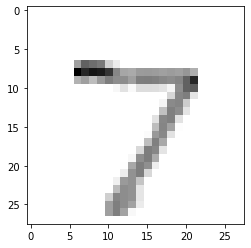

In [65]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # 28x28 numbers of 0-9
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)


In [0]:
model2 = tf.keras.models.Sequential()
#mode2l.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   #10 because dataset is numbers from 0 - 9


In [0]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution


In [6]:

model2.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model2.fit(x_train, y_train, epochs=3)  # train the model


Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2611 - accuracy: 0.9242
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1058 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9779


In [7]:
val_loss, val_acc = model2.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9717
0.09414893388748169
0.9717000126838684


In [12]:
#It's going to be very likely your accuracy out of sample is a bit worse, same with loss. In fact, it should be a red flag if it's identical, or better.
#Finally, with your model, you can save it super easily:
model2.save('epic_num_reader2.model2')
#Load it back:
new_model2 = tf.keras.models.load_model('epic_num_reader2.model2')
#finally, make predictions!

predictions = new_model2.predict(x_test)
print(predictions)



INFO:tensorflow:Assets written to: epic_num_reader2.model2/assets
[[1.8806920e-08 7.2085498e-08 5.1207397e-05 ... 9.9944955e-01
  3.6522234e-08 3.0127828e-07]
 [1.5194114e-09 4.6790802e-04 9.9953127e-01 ... 2.4981758e-10
  2.2406288e-09 2.8747407e-14]
 [1.2620936e-07 9.9968231e-01 1.4323343e-05 ... 1.9476244e-04
  4.9941293e-05 1.0034311e-06]
 ...
 [1.9464334e-08 2.4610154e-06 8.2054771e-07 ... 1.8867360e-05
  2.9811150e-05 4.6174566e-05]
 [8.2292918e-06 9.8187670e-08 1.7223569e-07 ... 5.9400492e-07
  1.4815134e-03 6.9009381e-08]
 [1.4143951e-07 2.7846856e-09 4.8992987e-08 ... 2.2638273e-11
  2.4992775e-07 1.5939754e-10]]


In [19]:
import numpy as np
print(np.argmax(predictions[0]))

7


**Unlike NumPy arrays, NumPy matrices are always 2D objects. So calling flatten on a NumPy matrix returns another 2D matrix, albeit one with shape (1, N):**



In [20]:
x = np.matrix(np.random.randint(10, size=(12,54)))
x.shape

(12, 54)

In [21]:
x.flatten().shape

(1, 648)